In [10]:
import numpy as np
import matplotlib.pyplot as plt

# This code implements the sub-gradient method to optimize the hinge loss, a non-differentiable
# function used in Support Vector Machines (SVMs). By minimizing hinge loss, we can approximate
# SVM model that separates data points with a linear decision boundary.

class SubGradientMethod:
    def __init__(self, alpha=0.01, max_iterations=1000):
        self.alpha = alpha  # Step size
        self.max_iterations = max_iterations
        self.x_history = []
        self.cost_history = []

    def cost_function(self, X, y, w, b):
        # Hinge loss L(w, b) = mean(max(0, 1 - y * (w^T * X + b)))
        hinge_loss = np.maximum(0, 1 - y * (X.dot(w) + b))
        return np.mean(hinge_loss)

    def subgradient(self, X, y, w, b):
        # Calculate subgradients for hinge loss
        grad_w = np.zeros_like(w)
        grad_b = 0
        # For misclassified points, calculate subgradient
        misclassified = y * (X.dot(w) + b) < 1
        grad_w = -np.mean((y[misclassified, None] * X[misclassified]), axis=0)
        grad_b = -np.mean(y[misclassified])
        return grad_w, grad_b

    def fit(self, X, y, initial_w, initial_b):
        w, b = initial_w, initial_b
        f_best = self.cost_function(X, y, w, b)
        w_best, b_best = w.copy(), b
        self.x_history.append((w.copy(), b))
        self.cost_history.append(f_best)

        for k in range(self.max_iterations):
            # Compute the subgradient
            grad_w, grad_b = self.subgradient(X, y, w, b)

            # Update weights and bias
            w -= self.alpha * grad_w
            b -= self.alpha * grad_b

            # Compute new cost
            f_new = self.cost_function(X, y, w, b)
            self.x_history.append((w.copy(), b))
            self.cost_history.append(f_new)

            # Update best cost if improved
            if f_new < f_best:
                f_best = f_new
                w_best, b_best = w.copy(), b

        return w_best, b_best


Optimized weights: [-0.55 -0.55]
Optimized bias: 1.7000000000000008


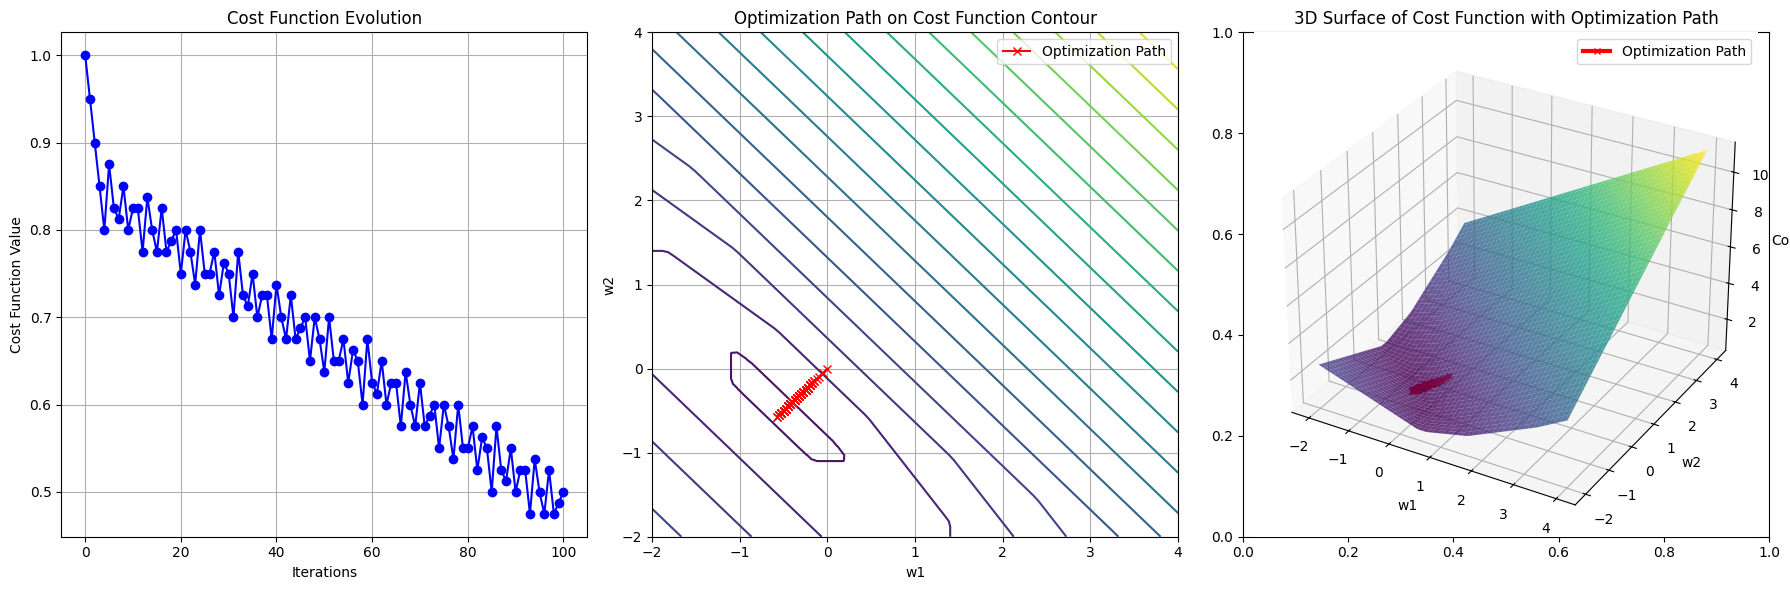

In [13]:
if __name__ == "__main__":
    # Sample data
    np.random.seed(0)
    X = np.array([[1, 2], [2, 1], [2, 3], [3, 2]])  # Feature matrix
    y = np.array([1, 1, -1, -1])  # Labels

    optimizer = SubGradientMethod(alpha=0.1, max_iterations=100)

    initial_w = np.zeros(X.shape[1])
    initial_b = 0

    w_best, b_best = optimizer.fit(X, y, initial_w, initial_b)

    print("Optimized weights:", w_best)
    print("Optimized bias:", b_best)

    w_vals = np.array([w for w, b in optimizer.x_history])

    x1 = np.linspace(-2, 4, 100)
    x2 = np.linspace(-2, 4, 100)
    X1, X2 = np.meshgrid(x1, x2)

    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            w_grid = np.array([X1[i, j], X2[i, j]])
            Z[i, j] = optimizer.cost_function(X, y, w_grid, b_best)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].plot(optimizer.cost_history, color='blue', marker='o')
    ax[0].set_title("Cost Function Evolution")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Cost Function Value")
    ax[0].grid(True)

    ax[1].contour(X1, X2, Z, levels=20, cmap='viridis')
    ax[1].plot(w_vals[:, 0], w_vals[:, 1], 'r-x', label="Optimization Path")
    ax[1].set_title("Optimization Path on Cost Function Contour")
    ax[1].set_xlabel("w1")
    ax[1].set_ylabel("w2")
    ax[1].legend()
    ax[1].grid(True)

    ax[2] = fig.add_subplot(133, projection='3d')
    ax[2].view_init(elev=30, azim=-60)
    ax[2].plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax[2].plot([w[0] for w, b in optimizer.x_history],
             [w[1] for w, b in optimizer.x_history],
             optimizer.cost_history,
             color='r', marker='x', markersize=5, linestyle='-', linewidth=3, label="Optimization Path")
    ax[2].set_title('3D Surface of Cost Function with Optimization Path')
    ax[2].set_xlabel('w1')
    ax[2].set_ylabel('w2')
    ax[2].set_zlabel('Cost')
    ax[2].legend()

    plt.tight_layout()
    plt.show()
